<a href="https://colab.research.google.com/github/DrDourado/Teaching_ME_615/blob/main/ME_615_08_Time_series_analysis_with_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 This notebook illustrates the concept of recurrent neural networks (RNNs) for time-series analysis. In this example, we will use the classic Air Passengers dataset, which contains the number of airline passengers over time. We'll compare the performance of a simple Multilayer Perceptron (MLP), an unfolded RNN, a Long Short-Term Memory (LSTM) cell, and a Gated Recurrent Unit (GRU) cell for time-series prediction.

In this notebook you'll find:

1. **Data Preprocessing:**
*   Load the dataset and normalize it using MinMaxScaler.
*   Split the dataset into training and testing sets.

2. **Model Creation:**
*   Define functions to create and compile MLP, RNN, LSTM, and GRU models.
*   For each model type, create a model with appropriate layers; [`tf.keras.layers.SimpleRNN`](https://https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN), [`tf.keras.layers.LSTM`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM), and [`tf.keras.layers.GRU`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU); compile it using mean squared error loss and the Adam optimizer.

3. **Model Training:**
*   Train each model on the training data.

4. **Model Evaluation:**
*   Make predictions on the training and testing data.
*   Invert the normalization to obtain actual predictions.
*   Calculate the root mean squared error (RMSE) for each model on both training and testing data.

5. **Plotting:**
*   Plot the original data along with predictions made by each model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

Auxiliary Functions

In [2]:
# Create the dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

**Recurrent Neural Network (RNN):**
A Recurrent Neural Network (RNN) is a type of artificial neural network designed to handle sequential data. Unlike feedforward neural networks (like Multilayer Perceptrons or MLPs), which process data in a single pass, RNNs maintain a form of memory to process sequences of inputs. They do this by maintaining hidden states that allow them to retain information about previous inputs in the sequence.

The key feature of RNNs is their ability to capture temporal dependencies in sequential data. Each neuron in an RNN is connected to itself, allowing it to maintain information over time. This recurrent connection enables RNNs to process sequences of arbitrary length and learn patterns in sequential data, making them well-suited for tasks such as time-series analysis, natural language processing, speech recognition, and more.

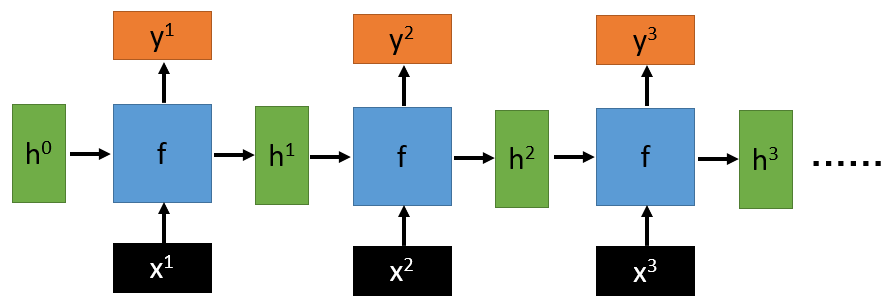

**Advantages of RNNs over MLPs for Time-Series Analysis:**
1. **Ability to Capture Temporal Dependencies:**
* RNNs excel at modeling sequences because they can capture the temporal dependencies between data points. In time-series analysis, past observations often influence future observations. RNNs can leverage this temporal information to make accurate predictions.

2. **Variable-Length Inputs:**
* Time-series data often comes in variable lengths. MLPs require fixed-size inputs, which can be problematic when dealing with sequences of varying lengths. RNNs, on the other hand, can process sequences of arbitrary length, making them more flexible for time-series analysis.

3. **Parameter Sharing:**
* RNNs share parameters across time steps, which helps in learning from sequential data efficiently. This parameter sharing enables RNNs to generalize well to unseen sequences and learn from past experiences.

4. **Contextual Understanding:**
* RNNs maintain hidden states that encode contextual information about past inputs. This allows them to understand the context of the current input based on previous inputs, which is crucial for tasks like time-series prediction where historical context matters.

5. **Efficient Memory Utilization:**
* RNNs are memory-efficient for sequential data because they do not require storing each input separately. Instead, they maintain a hidden state that encapsulates information from previous inputs, leading to more compact representations of sequential data.


In [3]:
# Define function to create and compile MLP model
def create_mlp_model(look_back):
    model = Sequential()
    model.add(Dense(8, input_shape=(1, look_back), activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define function to create and compile RNN model
def create_rnn_model(look_back):
    model = Sequential()
    model.add(SimpleRNN(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Before discussing LSTM and GRU, let's briefly review how simple RNNs work. Simple RNNs maintain a hidden state that is updated at each time step by combining the current input with the previous hidden state. While simple RNNs are capable of capturing short-term dependencies in sequential data, they suffer from two main issues:

1. **Vanishing Gradient Problem:**
* Simple RNNs struggle to capture long-term dependencies in sequences due to the vanishing gradient problem. During backpropagation through time, gradients tend to vanish as they are propagated over many time steps, making it difficult for the model to learn long-range dependencies.

2. **Exploding Gradient Problem:**
* Conversely, simple RNNs can also suffer from the exploding gradient problem, where gradients grow exponentially as they are propagated backward. This can lead to unstable training and make it challenging to converge to an optimal solution.

**LSTM (Long Short-Term Memory):**
LSTM is a type of RNN architecture designed to address the limitations of simple RNNs by introducing memory cells with gated mechanisms. Here's how LSTM addresses the issues:

1. **Long-Term Memory:**
* LSTM introduces a memory cell that can maintain information over long sequences without suffering from the vanishing gradient problem. The memory cell has an internal state that can be updated, allowing it to remember relevant information over multiple time steps.

2. **Gated Mechanisms:**
* LSTM employs three gates—input gate, forget gate, and output gate—that control the flow of information into and out of the memory cell. These gates regulate the information flow, allowing LSTM to selectively update its memory and forget irrelevant information. As a result, LSTM can learn to capture long-term dependencies more effectively.

3. **Addressing Vanishing Gradient:**
* By using the gated mechanisms, LSTM mitigates the vanishing gradient problem by allowing gradients to flow more freely through time. The forget gate enables LSTM to decide which information to retain or discard, preventing gradients from vanishing as they are propagated backward.

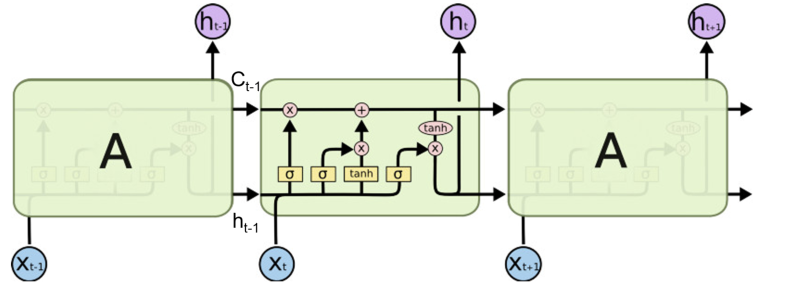

**GRU (Gated Recurrent Unit):**
GRU is another variant of the traditional RNN architecture, similar to LSTM but with a simplified structure. It combines the strengths of LSTM while being computationally more efficient. Here's how GRU differs from LSTM:

1. **Simplified Architecture:**
* GRU simplifies the LSTM architecture by merging the forget and input gates into a single update gate. Additionally, it combines the cell state and hidden state into a single state vector. This reduces the number of parameters and makes GRU more computationally efficient compared to LSTM.

2. **Effective Memory Utilization:**
* Like LSTM, GRU also utilizes gated mechanisms to control the flow of information, allowing it to capture long-term dependencies and mitigate the vanishing gradient problem. However, the simplified structure of GRU makes it easier to train and implement compared to LSTM.

3. **Training Efficiency:**
* Due to its simpler architecture, GRU models tend to train faster and require less computational resources compared to LSTM. This makes GRU a preferred choice in scenarios where computational efficiency is critical, such as large-scale neural network training or deployment on resource-constrained devices.

In summary, LSTM and GRU cells offer significant advantages over simple RNNs by addressing the vanishing gradient problem, capturing long-term dependencies more effectively, and being more computationally efficient. While LSTM provides a more sophisticated architecture with separate memory cells and gates, GRU offers a simpler yet effective alternative that is easier to train and deploy. The choice between LSTM and GRU depends on the specific requirements of the task and the available computational resources.

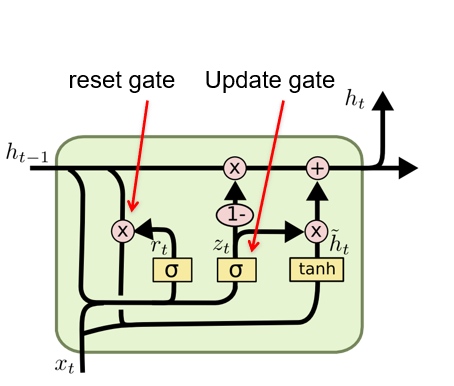

In [4]:
# Define function to create and compile LSTM model
def create_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(2, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define function to create and compile GRU model
def create_gru_model(look_back):
    model = Sequential()
    model.add(GRU(2, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Data pre-processing

In [5]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, usecols=[1], engine='python')
dataset = df.values.astype('float32')
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [6]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split the dataset into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

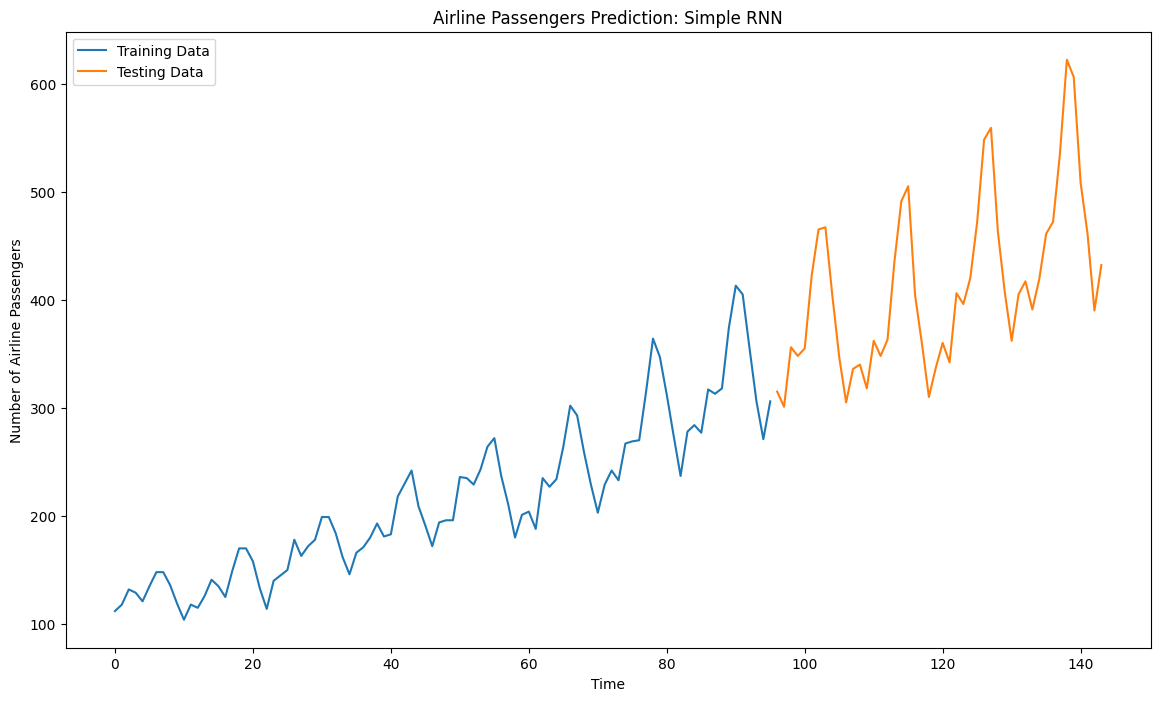

In [7]:
# Plotting the data
plt.figure(figsize=(14, 8))
plt.plot(range(train_size),scaler.inverse_transform(dataset[0:train_size,:]), label='Training Data')
plt.plot(range(train_size, len(dataset)),scaler.inverse_transform(dataset[train_size:len(dataset),:]), label='Testing Data')
plt.xlabel('Time')
plt.ylabel('Number of Airline Passengers')
plt.title('Airline Passengers Prediction: Simple RNN')
plt.legend()
plt.show()

MLP model

In [8]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, features, time steps]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# Train and evaluate MLP model
mlp_model = create_mlp_model(look_back)
mlp_model.fit(trainX, trainY, epochs=20, batch_size=look_back, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1124
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0313
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0103
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044
Epoch 16/20
94/94 ━

In [10]:
# Make predictions
trainPredictMLP = mlp_model.predict(trainX)
testPredictMLP = mlp_model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [11]:
# Invert predictions
trainPredictMLP = scaler.inverse_transform(trainPredictMLP[:,0].reshape(-1, 1))
testPredictMLP = scaler.inverse_transform(testPredictMLP[:,0].reshape(-1, 1))

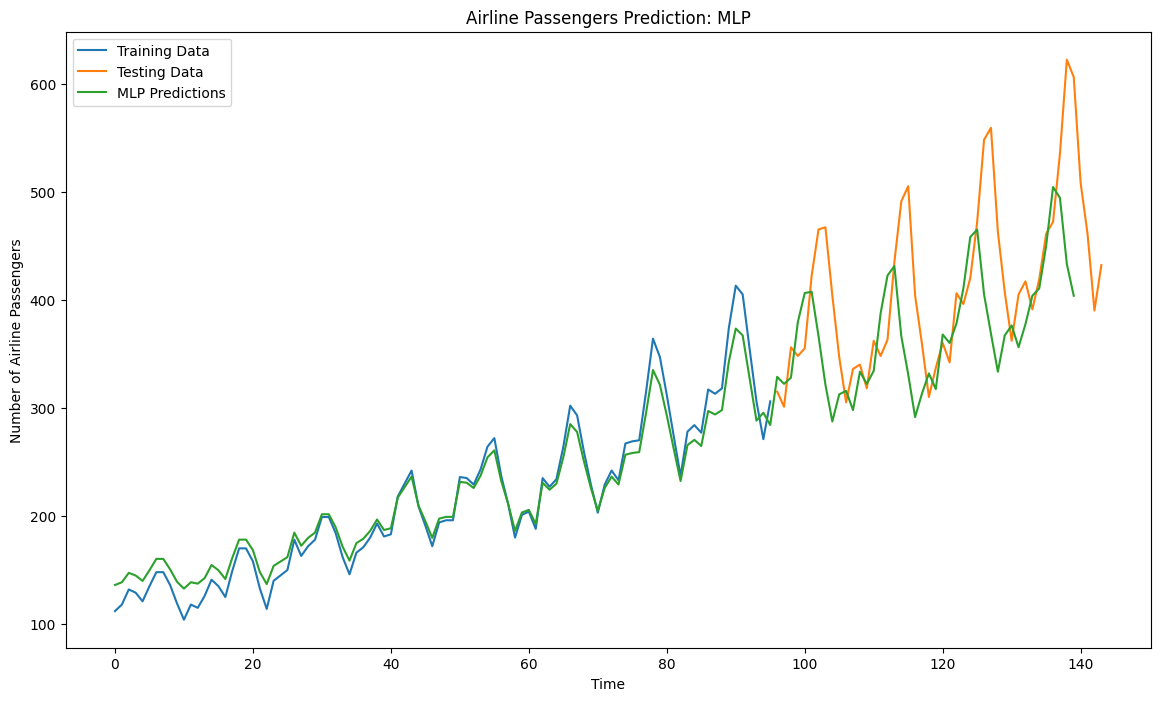

In [12]:
# Plotting MLP responses
plt.figure(figsize=(14, 8))
plt.plot(range(train_size),scaler.inverse_transform(dataset[0:train_size,:]), label='Training Data')
plt.plot(range(train_size, len(dataset)),scaler.inverse_transform(dataset[train_size:len(dataset),:]), label='Testing Data')
plt.plot(np.concatenate([trainPredictMLP, testPredictMLP]), label='MLP Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Airline Passengers')
plt.title('Airline Passengers Prediction: MLP')
plt.legend()
plt.show()

SimpleRNN Model

In [13]:
# Train and evaluate RNN model
rnn_model = create_rnn_model(look_back)
rnn_model.fit(trainX, trainY, epochs=30, batch_size=look_back, verbose=1)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1637
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0721
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0460
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0338
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0285
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0244
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0219
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0194
Epoch 10/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0135
Epoch 11/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128
Epoch 12/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0109
Epoch 13/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080
Epoch 14/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075
Epoch 15/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063
Epoch 16/30
94/94 ━━━━━━━━━━━━

In [14]:
trainPredictRNN = rnn_model.predict(trainX)
testPredictRNN = rnn_model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [15]:
trainPredictRNN = scaler.inverse_transform(trainPredictRNN)
testPredictRNN = scaler.inverse_transform(testPredictRNN)

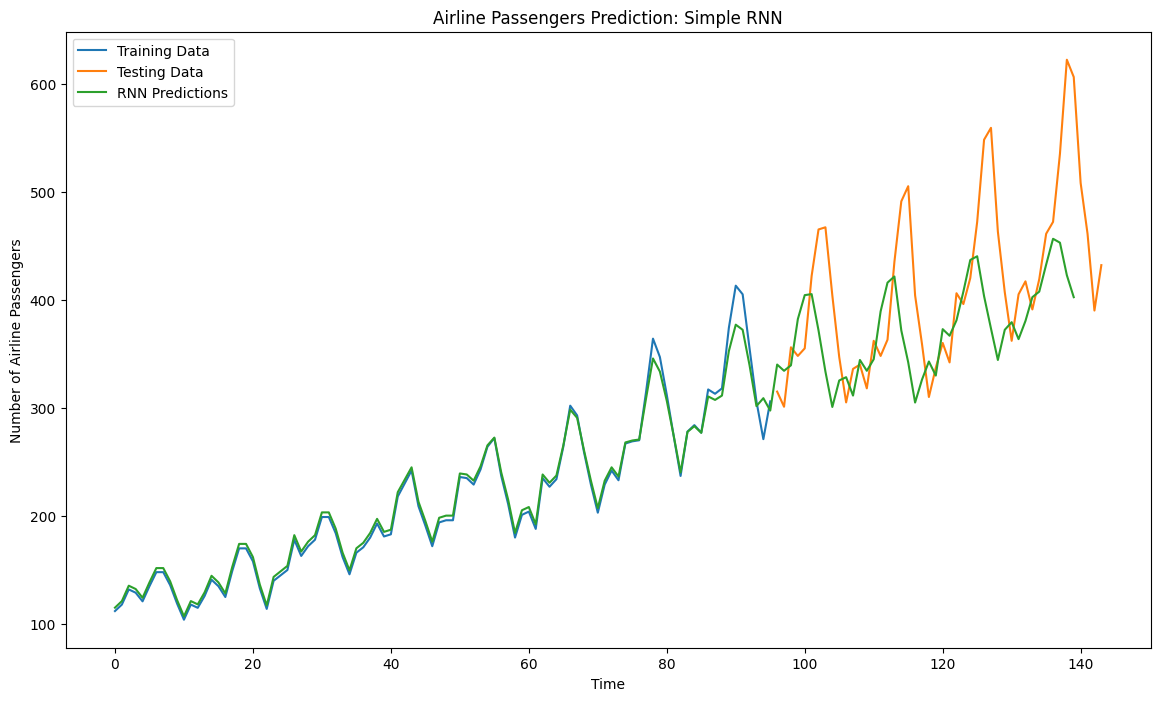

In [16]:
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(range(train_size),scaler.inverse_transform(dataset[0:train_size,:]), label='Training Data')
plt.plot(range(train_size, len(dataset)),scaler.inverse_transform(dataset[train_size:len(dataset),:]), label='Testing Data')
plt.plot(np.concatenate([trainPredictRNN, testPredictRNN]), label='RNN Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Airline Passengers')
plt.title('Airline Passengers Prediction: Simple RNN')
plt.legend()
plt.show()

LSTM model

In [17]:
# Train and evaluate LSTM model
lstm_model = create_lstm_model(look_back)
lstm_model.fit(trainX, trainY, epochs=20, batch_size=look_back, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0414
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0224
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0123
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070
Epoch 16/20
94/94 ━━━━━━━━━━━━

In [18]:
trainPredictLSTM = lstm_model.predict(trainX)
testPredictLSTM = lstm_model.predict(testX)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [19]:
trainPredictLSTM = scaler.inverse_transform(trainPredictLSTM)
testPredictLSTM = scaler.inverse_transform(testPredictLSTM)

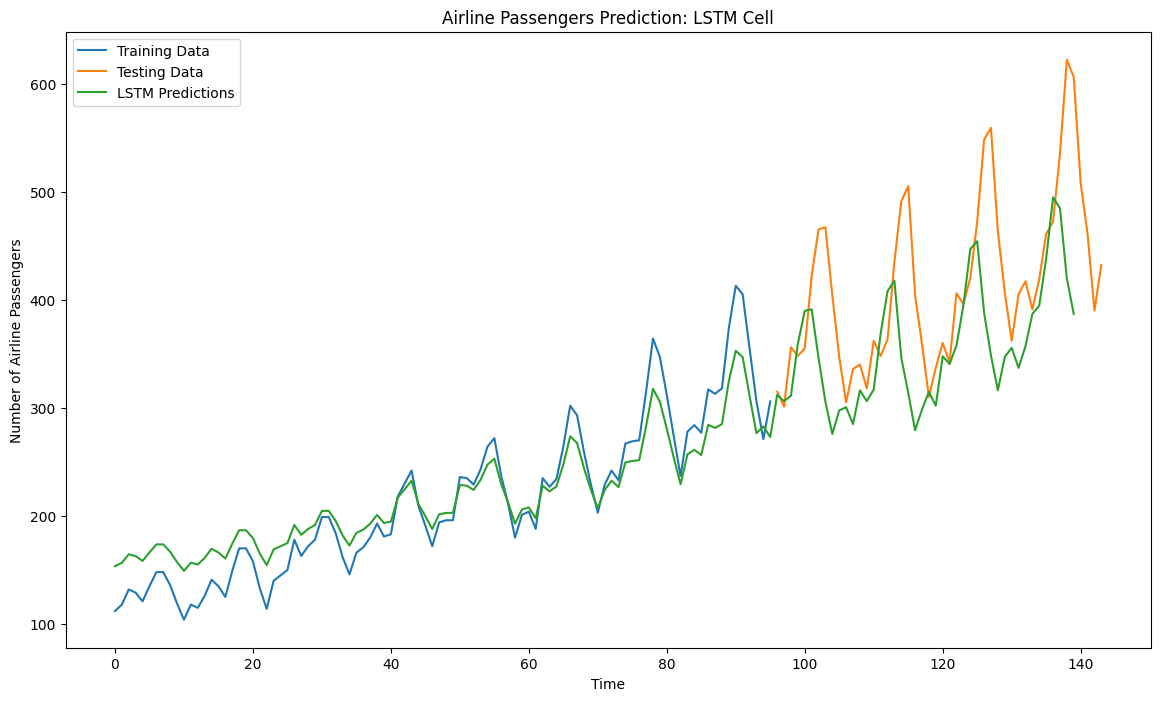

In [20]:
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(range(train_size),scaler.inverse_transform(dataset[0:train_size,:]), label='Training Data')
plt.plot(range(train_size, len(dataset)),scaler.inverse_transform(dataset[train_size:len(dataset),:]), label='Testing Data')
plt.plot(np.concatenate([trainPredictLSTM, testPredictLSTM]), label='LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Airline Passengers')
plt.title('Airline Passengers Prediction: LSTM Cell')
plt.legend()
plt.show()

GRU model

In [21]:
# Train and evaluate GRU model
gru_model = create_gru_model(look_back)
gru_model.fit(trainX, trainY, epochs=20, batch_size=look_back, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0387
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0119
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041
Epoch 16/20
94/94 ━━━━━━━━━━━━

In [22]:
trainPredictGRU = gru_model.predict(trainX)
testPredictGRU = gru_model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [23]:
trainPredictGRU = scaler.inverse_transform(trainPredictGRU)
testPredictGRU = scaler.inverse_transform(testPredictGRU)

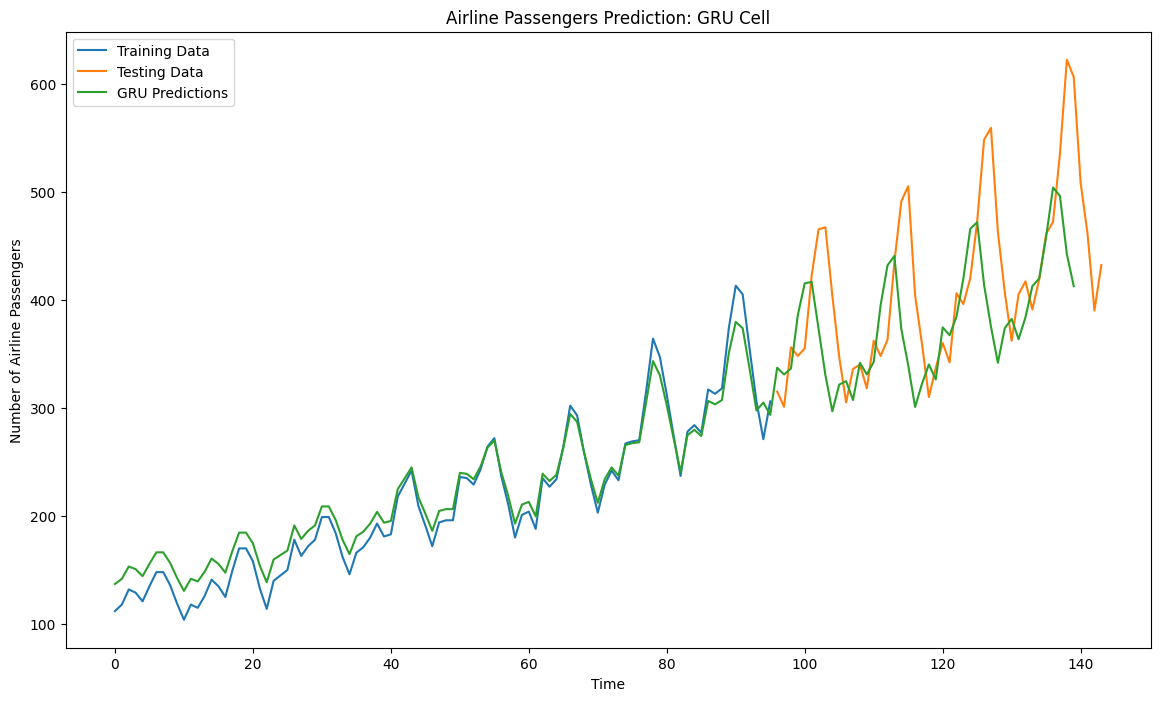

In [24]:
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(range(train_size),scaler.inverse_transform(dataset[0:train_size,:]), label='Training Data')
plt.plot(range(train_size, len(dataset)),scaler.inverse_transform(dataset[train_size:len(dataset),:]), label='Testing Data')
plt.plot(np.concatenate([trainPredictGRU, testPredictGRU]), label='GRU Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Airline Passengers')
plt.title('Airline Passengers Prediction: GRU Cell')
plt.legend()
plt.show()

Model comparisons

In [25]:
# Calculate root mean squared error
trainY = scaler.inverse_transform([trainY])
testY = scaler.inverse_transform([testY])

trainScoreMLP = np.sqrt(mean_squared_error(trainY[0], trainPredictMLP[:,0]))
testScoreMLP = np.sqrt(mean_squared_error(testY[0], testPredictMLP[:,0]))

trainScoreRNN = np.sqrt(mean_squared_error(trainY[0], trainPredictRNN[:,0]))
testScoreRNN = np.sqrt(mean_squared_error(testY[0], testPredictRNN[:,0]))

trainScoreLSTM = np.sqrt(mean_squared_error(trainY[0], trainPredictLSTM[:,0]))
testScoreLSTM = np.sqrt(mean_squared_error(testY[0], testPredictLSTM[:,0]))

trainScoreGRU = np.sqrt(mean_squared_error(trainY[0], trainPredictGRU[:,0]))
testScoreGRU = np.sqrt(mean_squared_error(testY[0], testPredictGRU[:,0]))

In [26]:
print("MLP Train Score: %.2f RMSE" % (trainScoreMLP))
print("MLP Test Score: %.2f RMSE" % (testScoreMLP))

print("RNN Train Score: %.2f RMSE" % (trainScoreRNN))
print("RNN Test Score: %.2f RMSE" % (testScoreRNN))

print("LSTM Train Score: %.2f RMSE" % (trainScoreLSTM))
print("LSTM Test Score: %.2f RMSE" % (testScoreLSTM))

print("GRU Train Score: %.2f RMSE" % (trainScoreGRU))
print("GRU Test Score: %.2f RMSE" % (testScoreGRU))

MLP Train Score: 24.80 RMSE
MLP Test Score: 65.94 RMSE
RNN Train Score: 22.71 RMSE
RNN Test Score: 67.64 RMSE
LSTM Train Score: 30.88 RMSE
LSTM Test Score: 77.94 RMSE
GRU Train Score: 24.83 RMSE
GRU Test Score: 60.71 RMSE


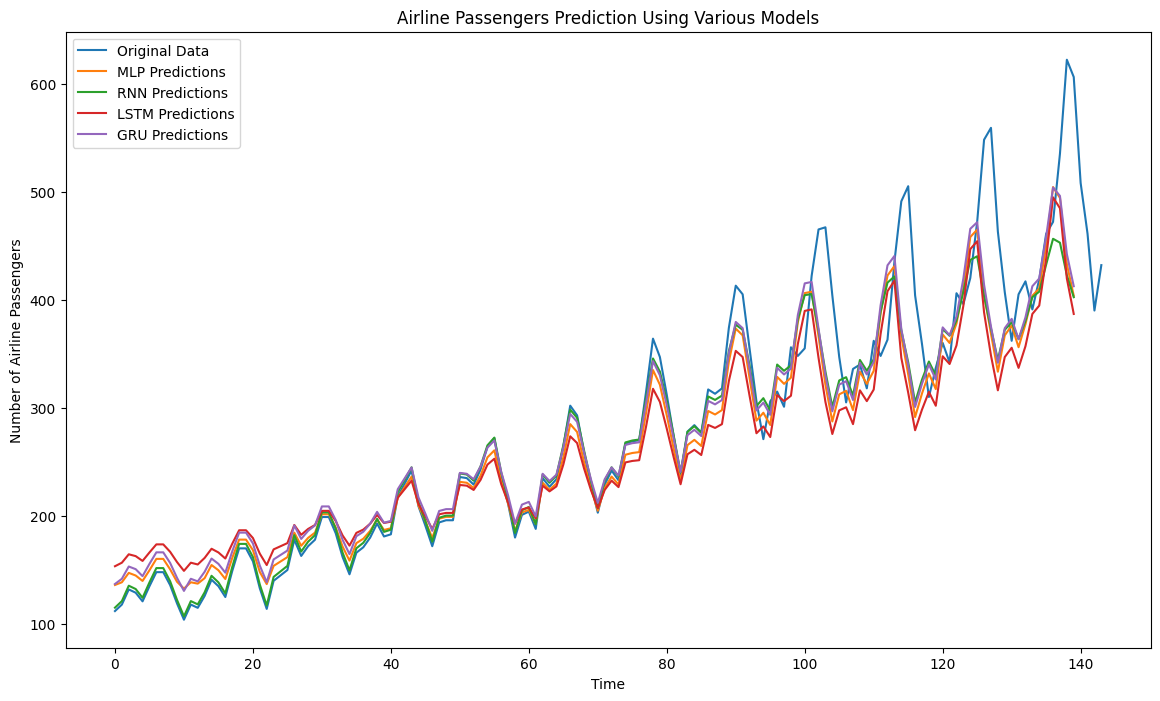

In [27]:
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(np.concatenate([trainPredictMLP, testPredictMLP]), label='MLP Predictions')
plt.plot(np.concatenate([trainPredictRNN, testPredictRNN]), label='RNN Predictions')
plt.plot(np.concatenate([trainPredictLSTM, testPredictLSTM]), label='LSTM Predictions')
plt.plot(np.concatenate([trainPredictGRU, testPredictGRU]), label='GRU Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Airline Passengers')
plt.title('Airline Passengers Prediction Using Various Models')
plt.legend()
plt.show()

Effect of `lock_back`

In [28]:
look_back = 5
trainX_10, trainY_10 = create_dataset(train, look_back)
testX_10, testY_10 = create_dataset(test, look_back)

# Reshape input to be [samples, features, time steps]
trainX_10 = np.reshape(trainX_10, (trainX_10.shape[0], 1, trainX_10.shape[1] ))
testX_10 = np.reshape(testX_10, (testX_10.shape[0], 1, testX_10.shape[1]))

In [29]:
trainX.shape,trainX_10.shape

((94, 1, 1), (90, 1, 5))

In [30]:
# Train and evaluate MLP model
mlp_model = create_mlp_model(look_back)
mlp_model.fit(trainX_10, trainY_10, epochs=30, batch_size=look_back, verbose=1)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0267   
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0251 
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0265 
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203 
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189 
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228 
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238 
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0221 
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0177 
Epoch 13/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 
Epoch 14/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 
Epoch 15/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 
Epoch 16/30
1

In [31]:
# Make predictions
trainPredictMLP = mlp_model.predict(trainX_10)
testPredictMLP = mlp_model.predict(testX_10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [32]:
# Invert predictions
trainPredictMLP = scaler.inverse_transform(trainPredictMLP[:,0].reshape(-1, 1))
testPredictMLP = scaler.inverse_transform(testPredictMLP[:,0].reshape(-1, 1))

In [33]:
# Train and evaluate RNN model
rnn_model = create_rnn_model(look_back)
rnn_model.fit(trainX_10, trainY_10, epochs=50, batch_size=look_back, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0154
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066 
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 
Epoch 16/50
18/18 

In [34]:
trainPredictRNN = rnn_model.predict(trainX_10)
testPredictRNN = rnn_model.predict(testX_10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [35]:
trainPredictRNN = scaler.inverse_transform(trainPredictRNN)
testPredictRNN = scaler.inverse_transform(testPredictRNN)

In [36]:
# Train and evaluate LSTM model
lstm_model = create_lstm_model(look_back)
lstm_model.fit(trainX_10, trainY_10, epochs=40, batch_size=look_back, verbose=1)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0630
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0357 
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0321 
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0227 
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0197 
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 
Epoch 9/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076
Epoch 10/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101
Epoch 11/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095
Epoch 12/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082
Epoch 13/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094
Epoch 14/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082
Epoch 15/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082
Epoch 16/40
18/18 ━━━━━━

In [37]:
trainPredictLSTM = lstm_model.predict(trainX_10)
testPredictLSTM = lstm_model.predict(testX_10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [38]:
trainPredictLSTM = scaler.inverse_transform(trainPredictLSTM)
testPredictLSTM = scaler.inverse_transform(testPredictLSTM)

In [39]:
# Train and evaluate GRU model
gru_model = create_gru_model(look_back)
gru_model.fit(trainX_10, trainY_10, epochs=40, batch_size=look_back, verbose=1)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1430
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0913 
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0702 
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0459 
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0423 
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0331 
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0223 
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0210 
Epoch 9/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 
Epoch 10/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 
Epoch 11/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 
Epoch 12/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0141
Epoch 13/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 
Epoch 14/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 
Epoch 15/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0147 
Epoch 16/40
18/18

In [40]:
trainPredictGRU = gru_model.predict(trainX_10)
testPredictGRU = gru_model.predict(testX_10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [41]:
trainPredictGRU = scaler.inverse_transform(trainPredictGRU)
testPredictGRU = scaler.inverse_transform(testPredictGRU)

In [42]:
# Calculate root mean squared error
trainY_10 = scaler.inverse_transform([trainY_10])
testY_10 = scaler.inverse_transform([testY_10])

trainScoreMLP = np.sqrt(mean_squared_error(trainY_10[0], trainPredictMLP[:,0]))
testScoreMLP = np.sqrt(mean_squared_error(testY_10[0], testPredictMLP[:,0]))

trainScoreRNN = np.sqrt(mean_squared_error(trainY_10[0], trainPredictRNN[:,0]))
testScoreRNN = np.sqrt(mean_squared_error(testY_10[0], testPredictRNN[:,0]))

trainScoreLSTM = np.sqrt(mean_squared_error(trainY_10[0], trainPredictLSTM[:,0]))
testScoreLSTM = np.sqrt(mean_squared_error(testY_10[0], testPredictLSTM[:,0]))

trainScoreGRU = np.sqrt(mean_squared_error(trainY_10[0], trainPredictGRU[:,0]))
testScoreGRU = np.sqrt(mean_squared_error(testY_10[0], testPredictGRU[:,0]))

In [43]:
print("MLP Train Score: %.2f RMSE" % (trainScoreMLP))
print("MLP Test Score: %.2f RMSE" % (testScoreMLP))

print("RNN Train Score: %.2f RMSE" % (trainScoreRNN))
print("RNN Test Score: %.2f RMSE" % (testScoreRNN))

print("LSTM Train Score: %.2f RMSE" % (trainScoreLSTM))
print("LSTM Test Score: %.2f RMSE" % (testScoreLSTM))

print("GRU Train Score: %.2f RMSE" % (trainScoreGRU))
print("GRU Test Score: %.2f RMSE" % (testScoreGRU))

MLP Train Score: 58.81 RMSE
MLP Test Score: 166.26 RMSE
RNN Train Score: 30.51 RMSE
RNN Test Score: 102.81 RMSE
LSTM Train Score: 33.79 RMSE
LSTM Test Score: 80.63 RMSE
GRU Train Score: 37.00 RMSE
GRU Test Score: 95.03 RMSE


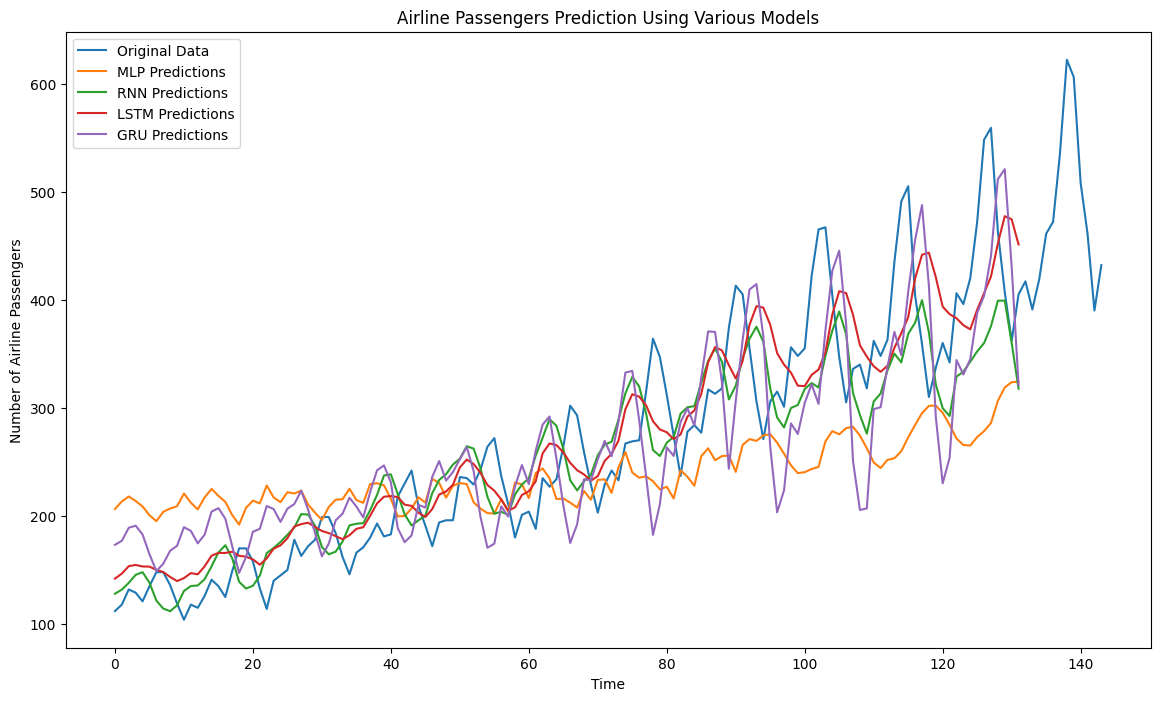

In [44]:
# Plotting
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(np.concatenate([trainPredictMLP, testPredictMLP]), label='MLP Predictions')
plt.plot(np.concatenate([trainPredictRNN, testPredictRNN]), label='RNN Predictions')
plt.plot(np.concatenate([trainPredictLSTM, testPredictLSTM]), label='LSTM Predictions')
plt.plot(np.concatenate([trainPredictGRU, testPredictGRU]), label='GRU Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Airline Passengers')
plt.title('Airline Passengers Prediction Using Various Models')
plt.legend()
plt.show()